In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [2]:
df = pd.read_csv('movies_metadata.csv')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df
print(df.shape)

(45466, 24)


In [4]:
df1 = pd.read_csv('credits.csv')


In [8]:
df1.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [9]:
df2 = pd.read_csv('keywords.csv')
df2.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [10]:
df3 = pd.read_csv('links_small.csv')
df3.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
df4 = pd.read_csv('ratings_small.csv')
df4.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [15]:
movie_titles = df[['title','id']]
movie_titles.rename(columns = {'id':'movieId'}, inplace = True)
movie_titles._get_value(19730,'title') 


nan

In [16]:
print(movie_titles.shape)
movie_titles=movie_titles.dropna().reset_index(drop=True)
movie_titles['movieId'] = pd.to_numeric(movie_titles['movieId'])

# print(movie_titles['movieId'])

(45466, 2)


In [11]:
df5 = pd.merge(df4,movie_titles,on='movieId')
df5.head()

,userId,movieId,rating,timestamp,title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [12]:
df5.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Frank Herbert's Dune    5.0
Long Pigs               5.0
The Brothers Grimm      5.0
Knight Moves            5.0
Kismet                  5.0
Name: rating, dtype: float64

In [13]:
df5.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Terminator 3: Rise of the Machines    324
The Million Dollar Hotel              311
Solaris                               305
The 39 Steps                          291
Monsoon Wedding                       274
Name: rating, dtype: int64

In [14]:
ratings = pd.DataFrame(df5.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
!Women Art Revolution,3.25
'Gator Bait,0.50
'Twas the Night Before Christmas,4.00
...And God Created Woman,4.00
00 Schneider - Jagd auf Nihil Baxter,4.00


In [15]:
ratings['num of ratings'] = pd.DataFrame(df5.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
!Women Art Revolution,3.25,2
'Gator Bait,0.50,1
'Twas the Night Before Christmas,4.00,2
...And God Created Woman,4.00,1
00 Schneider - Jagd auf Nihil Baxter,4.00,2


<AxesSubplot:>

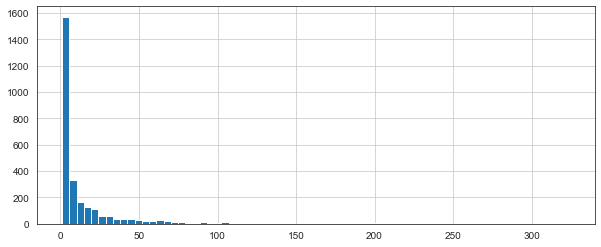

In [16]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

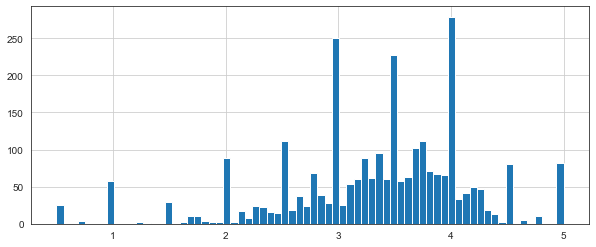

In [17]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

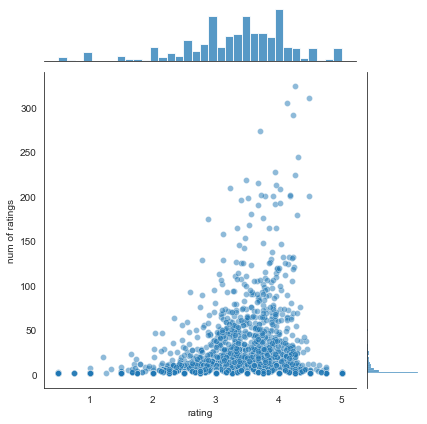

In [18]:
sns.jointplot(x ='rating',y ='num of ratings',data=ratings,alpha=0.5)

In [19]:
df5.head()

,userId,movieId,rating,timestamp,title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [20]:
moviedf = df5.pivot_table(index='userId',columns='title',values='rating')
moviedf.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Terminator 3: Rise of the Machines,4.256173,324
The Million Dollar Hotel,4.487138,311
Solaris,4.134426,305
The 39 Steps,4.221649,291
Monsoon Wedding,3.706204,274
Once Were Warriors,4.303279,244
Three Colors: Red,3.945175,228
Men in Black II,4.256696,224
The Passion of Joan of Arc,3.483945,218


In [22]:
terminator_user_ratings = moviedf['Terminator 3: Rise of the Machines']
terminator_user_ratings.head()

userId
1    NaN
2    4.0
3    4.5
4    5.0
5    NaN
Name: Terminator 3: Rise of the Machines, dtype: float64

In [23]:
similar_to_terminator = moviedf.corrwith(terminator_user_ratings)

C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
corr_terminator = pd.DataFrame(similar_to_terminator,columns=['Correlation'])
corr_terminator.dropna(inplace=True)
corr_terminator.head()

,Correlation
title,
'Twas the Night Before Christmas,1.000000
00 Schneider - Jagd auf Nihil Baxter,1.000000
10 Items or Less,-0.361158
10 Things I Hate About You,0.487316
1984,0.914659


In [25]:
corr_terminator.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
The Assault,1.0
Lifeguard,1.0
Far Away,1.0
Gigantics,1.0
Gomorrah,1.0
The Bride Wore Black,1.0
Gremlins,1.0
A Hard Day's Night,1.0
Merlin,1.0


In [26]:
corr_terminator = corr_terminator.join(ratings['num of ratings'])
corr_terminator.head()

,Correlation,num of ratings
title,,
'Twas the Night Before Christmas,1.000000,2
00 Schneider - Jagd auf Nihil Baxter,1.000000,2
10 Items or Less,-0.361158,11
10 Things I Hate About You,0.487316,7
1984,0.914659,8


In [27]:
corr_terminator[corr_terminator['num of ratings'] > 100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Terminator 3: Rise of the Machines,1.000000,324
Men in Black II,0.472422,224
The Thomas Crown Affair,0.446644,179
Point Break,0.406478,132
The Man with the Golden Arm,0.356941,146


In [28]:
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset

In [29]:
df5.head()

,userId,movieId,rating,timestamp,title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [30]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [31]:
train_data = df4[['userId','movieId','rating']];
train_data


,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [32]:
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset

In [33]:
reader = Reader(rating_scale=(1,5))

In [49]:
train_data_mf = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)
train_data_mf

In [35]:
trainset = train_data_mf.build_full_trainset()

In [48]:
print(trainset)

In [36]:
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [50]:
train_preds = svd.test(trainset.build_testset())
train_pred_mf = np.array([pred.est for pred in train_preds])

In [53]:
# Creating a sparse matrix
from scipy.sparse import csr_matrix
train_sparse_matrix = csr_matrix((train_data.rating.values, (train_data.userId.values, train_data.movieId.values)))
print(train_sparse_matrix.shape)
print(train_sparse_matrix)

(672, 163950)
  (1, 31)	2.5
  (1, 1029)	3.0
  (1, 1061)	3.0
  (1, 1129)	2.0
  (1, 1172)	4.0
  (1, 1263)	2.0
  (1, 1287)	2.0
  (1, 1293)	2.0
  (1, 1339)	3.5
  (1, 1343)	2.0
  (1, 1371)	2.5
  (1, 1405)	1.0
  (1, 1953)	4.0
  (1, 2105)	4.0
  (1, 2150)	3.0
  (1, 2193)	2.0
  (1, 2294)	2.0
  (1, 2455)	2.5
  (1, 2968)	1.0
  (1, 3671)	3.0
  (2, 10)	4.0
  (2, 17)	5.0
  (2, 39)	5.0
  (2, 47)	4.0
  (2, 50)	4.0
  :	:
  (671, 4896)	5.0
  (671, 4963)	4.5
  (671, 4973)	4.5
  (671, 4993)	5.0
  (671, 4995)	4.0
  (671, 5010)	2.0
  (671, 5218)	2.0
  (671, 5299)	3.0
  (671, 5349)	4.0
  (671, 5377)	4.0
  (671, 5445)	4.5
  (671, 5464)	3.0
  (671, 5669)	4.0
  (671, 5816)	4.0
  (671, 5902)	3.5
  (671, 5952)	5.0
  (671, 5989)	4.0
  (671, 5991)	4.5
  (671, 5995)	4.0
  (671, 6212)	2.5
  (671, 6268)	2.5
  (671, 6269)	4.0
  (671, 6365)	4.0
  (671, 6385)	2.5
  (671, 6565)	3.5


In [52]:
train_averages = dict()
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.543608255669773}

In [40]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)
def get_average_ratings(sparse_matrix, of_users):
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes
    # ".A1" is for converting Column_Matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    # max_user and max_movie ids in sparse matrix
    u,m = sparse_matrix.shape
    # create a dictionary of users and their average ratings..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
    for i in range(u if of_users else m)
    if no_of_ratings[i] !=0}
    #return that dictionary of average ratings
    return average_ratings

In [41]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
train_averages['movie'] = get_average_ratings(train_sparse_matrix, of_users=False)

In [42]:
print(train_sparse_matrix)

  (1, 31)	2.5
  (1, 1029)	3.0
  (1, 1061)	3.0
  (1, 1129)	2.0
  (1, 1172)	4.0
  (1, 1263)	2.0
  (1, 1287)	2.0
  (1, 1293)	2.0
  (1, 1339)	3.5
  (1, 1343)	2.0
  (1, 1371)	2.5
  (1, 1405)	1.0
  (1, 1953)	4.0
  (1, 2105)	4.0
  (1, 2150)	3.0
  (1, 2193)	2.0
  (1, 2294)	2.0
  (1, 2455)	2.5
  (1, 2968)	1.0
  (1, 3671)	3.0
  (2, 10)	4.0
  (2, 17)	5.0
  (2, 39)	5.0
  (2, 47)	4.0
  (2, 50)	4.0
  :	:
  (671, 4896)	5.0
  (671, 4963)	4.5
  (671, 4973)	4.5
  (671, 4993)	5.0
  (671, 4995)	4.0
  (671, 5010)	2.0
  (671, 5218)	2.0
  (671, 5299)	3.0
  (671, 5349)	4.0
  (671, 5377)	4.0
  (671, 5445)	4.5
  (671, 5464)	3.0
  (671, 5669)	4.0
  (671, 5816)	4.0
  (671, 5902)	3.5
  (671, 5952)	5.0
  (671, 5989)	4.0
  (671, 5991)	4.5
  (671, 5995)	4.0
  (671, 6212)	2.5
  (671, 6268)	2.5
  (671, 6269)	4.0
  (671, 6365)	4.0
  (671, 6385)	2.5
  (671, 6565)	3.5


In [43]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [44]:
user_sim = cosine_similarity(train_sparse_matrix).ravel()
top_sim_users = user_sim.argsort()[::-1][1:]
print(type(user_sim))
print(user_sim)
top_sim_users
print(user_sim.size)
print(top_sim_users.size)


<class 'numpy.ndarray'>
[0.         0.         0.         ... 0.08520194 0.22867673 1.        ]
451584
451583


In [45]:
# top_ratings = top_sim_users.toarray().ravel()

In [46]:
top_ratings = top_sim_users.ravel() 

top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
top_sim_users_ratings.extend([train_averages['movie']]*(5 -len(top_sim_users_ratings)))

top_sim_users_ratings

[342557, 20190, 447545, 142676, 311599]

In [ ]:
# compute the similar movies of the "movie"
movie_sim = cosine_similarity(train_sparse_matrix[:,movie].T,train_sparse_matrix.T).ravel()